In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Red Wine Quality dataset directly
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Display chemical features
print("Chemical Features (Acidity, Sugar, Chlorides, etc.):")
print(df.head())

Chemical Features (Acidity, Sugar, Chlorides, etc.):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4 


Top Chemical Drivers for Quality:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


/tmp/ipython-input-2279757486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='vlag')


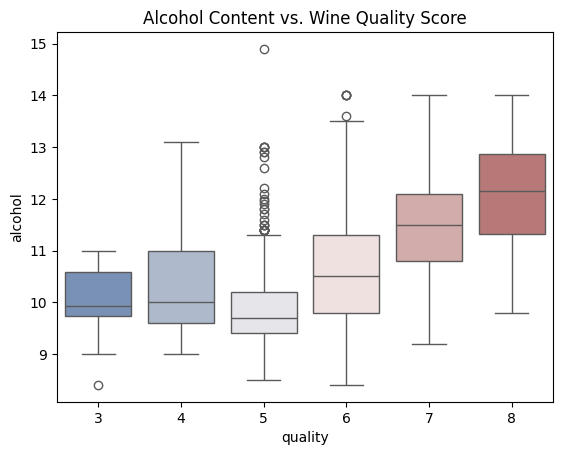

In [2]:
# Check which chemicals correlate most with Quality
correlations = df.corr()['quality'].sort_values(ascending=False)
print("\nTop Chemical Drivers for Quality:\n", correlations)

# Visualizing the impact of Alcohol on Quality
sns.boxplot(x='quality', y='alcohol', data=df, palette='vlag')
plt.title('Alcohol Content vs. Wine Quality Score')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Define X and y
X = df.drop('quality', axis=1)
y = df['quality']

# 2. Scale the data (SVMs are sensitive to the scale of numbers)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train the SVM Classifier
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

SVC()

In [4]:
# Predictions
y_pred = model.predict(X_test)

# Results
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Performance Report:")
# We use zero_division=0 to handle quality levels that might not appear in the test split
print(classification_report(y_test, y_pred, zero_division=0))

Overall Accuracy: 60.31%

Detailed Performance Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



In [5]:
# Predictions
y_pred = model.predict(X_test)

# Results
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Performance Report:")
# We use zero_division=0 to handle quality levels that might not appear in the test split
print(classification_report(y_test, y_pred, zero_division=0))

Overall Accuracy: 60.31%

Detailed Performance Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



In [6]:
from sklearn.svm import SVC

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Classifier
# 'rbf' kernel allows the model to find non-linear patterns
model = SVC(kernel='rbf', C=1.2, gamma='scale')
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Total Accuracy: 59.69%

--- Classification Report ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.55      0.62      0.58       132
           7       0.53      0.24      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.56      0.60      0.57       320



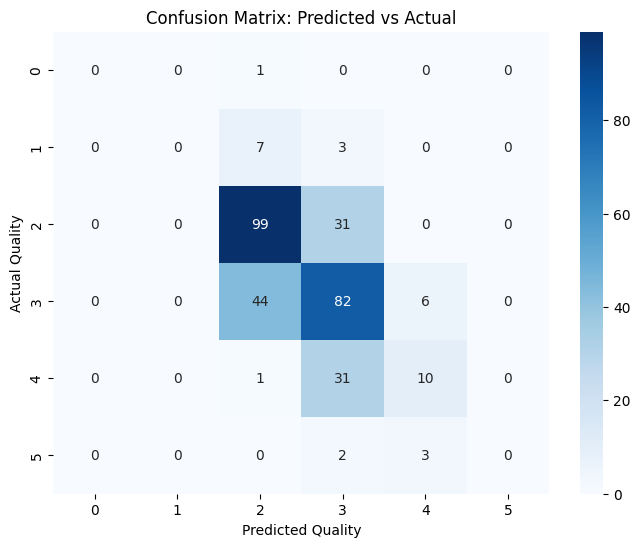

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print(f"Total Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, zero_division=0))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.show()